### Data Preprocessing 

In [3]:
# Importing the required libraries for visualization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization Prefrences.
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

/var/folders/db/j89yx8ld557g0y6h36s2d06r0000gn/T/ipykernel_19197/232882520.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization Prefrences.
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
# Data Retrieving
df = pd.read_csv("Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
# Extract Descriptive Data.
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.63
std,3.52,4.30,24.30,351.91,0.01,0.48
min,6.98,9.71,43.79,143.50,0.05,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.00
50%,13.37,18.84,86.24,551.10,0.10,1.00
75%,15.78,21.80,104.10,782.70,0.11,1.00
max,28.11,39.28,188.50,2501.00,0.16,1.00


diagnosis
1    357
0    212
Name: count, dtype: int64


<Axes: title={'center': 'Breast Cancer Counts'}, xlabel='diagnosis'>

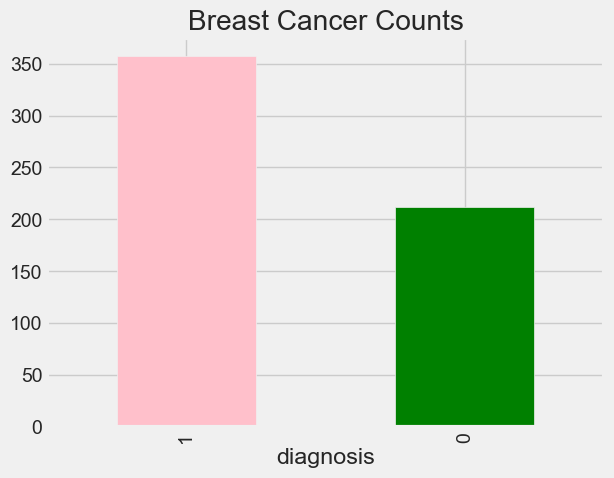

In [6]:
#Viewing the status of women in the data set : 
print(df.diagnosis.value_counts())
df.diagnosis.value_counts().plot(kind="bar", color=["pink", "green"], title = 'Breast Cancer Counts')


In [7]:
# Check for Null Values
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
# Categorical and Numerical Continious Features 
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('==============================')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")


mean_radius : [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11.8   14.44  13.74
  8.

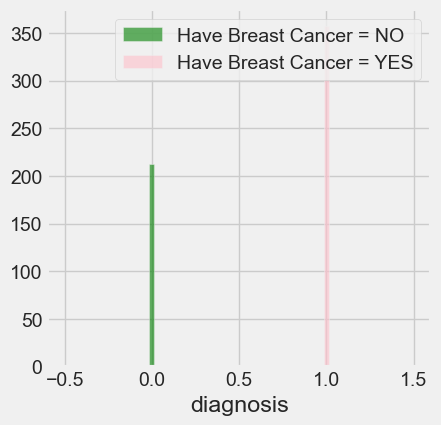

In [9]:
#Study of the relationship of categorical features and breast cancer:

plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["diagnosis"] == 0][column].hist(bins=35, color='green', label='Have Breast Cancer = NO', alpha=0.6)
    df[df["diagnosis"] == 1][column].hist(bins=35, color='pink', label='Have Breast Cancer = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

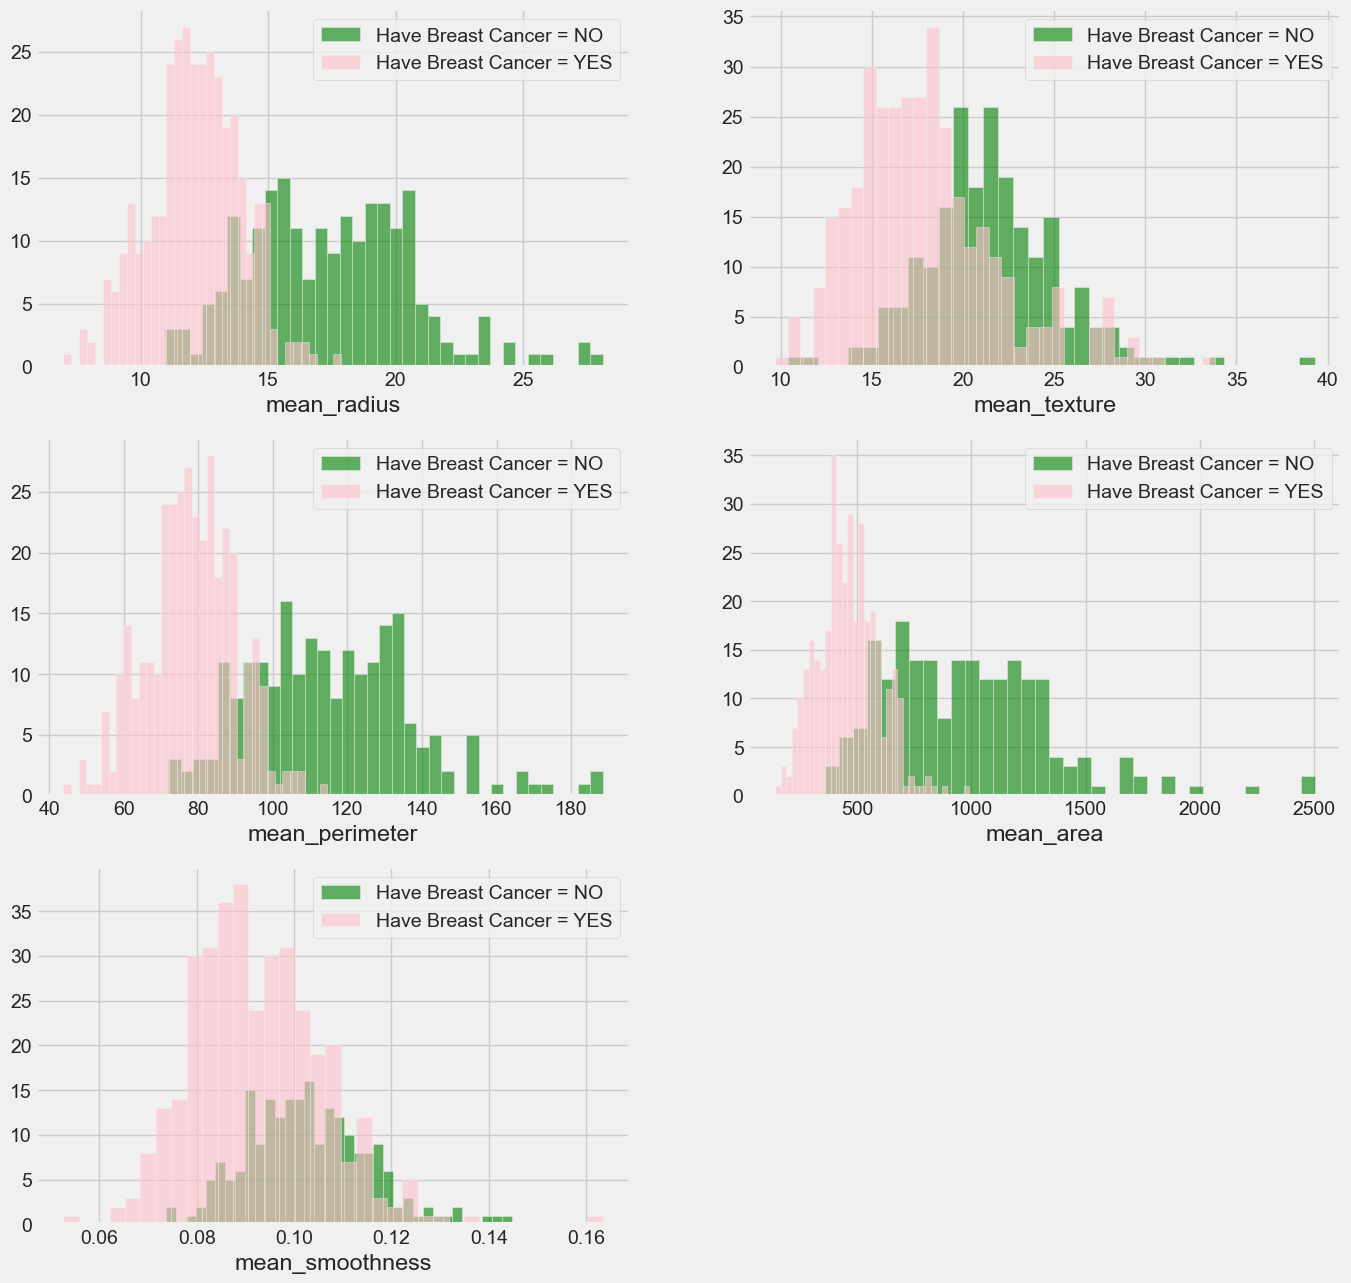

In [10]:
#Study of the relationship of continuous features and breast cancer:

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["diagnosis"] == 0][column].hist(bins=35, color='green', label='Have Breast Cancer = NO', alpha=0.6)
    df[df["diagnosis"] == 1][column].hist(bins=35, color='pink', label='Have Breast Cancer = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

(6.5, -0.5)

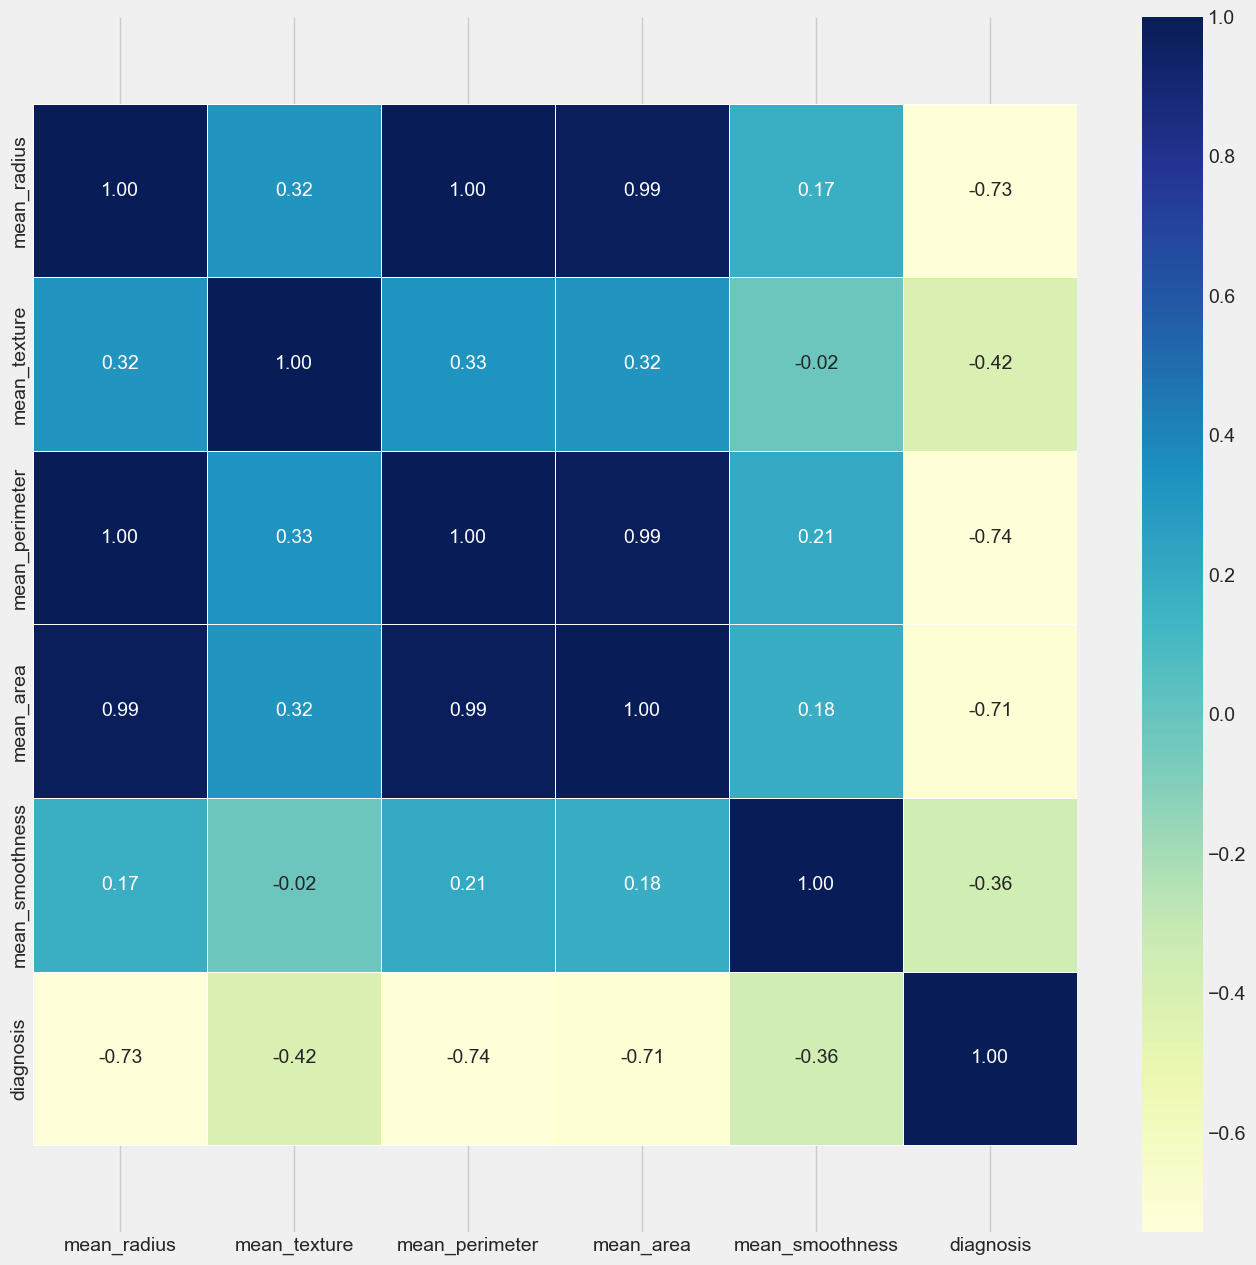

In [11]:
# Studying the correlations between features using Heat Map!
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with diagnosis'}>

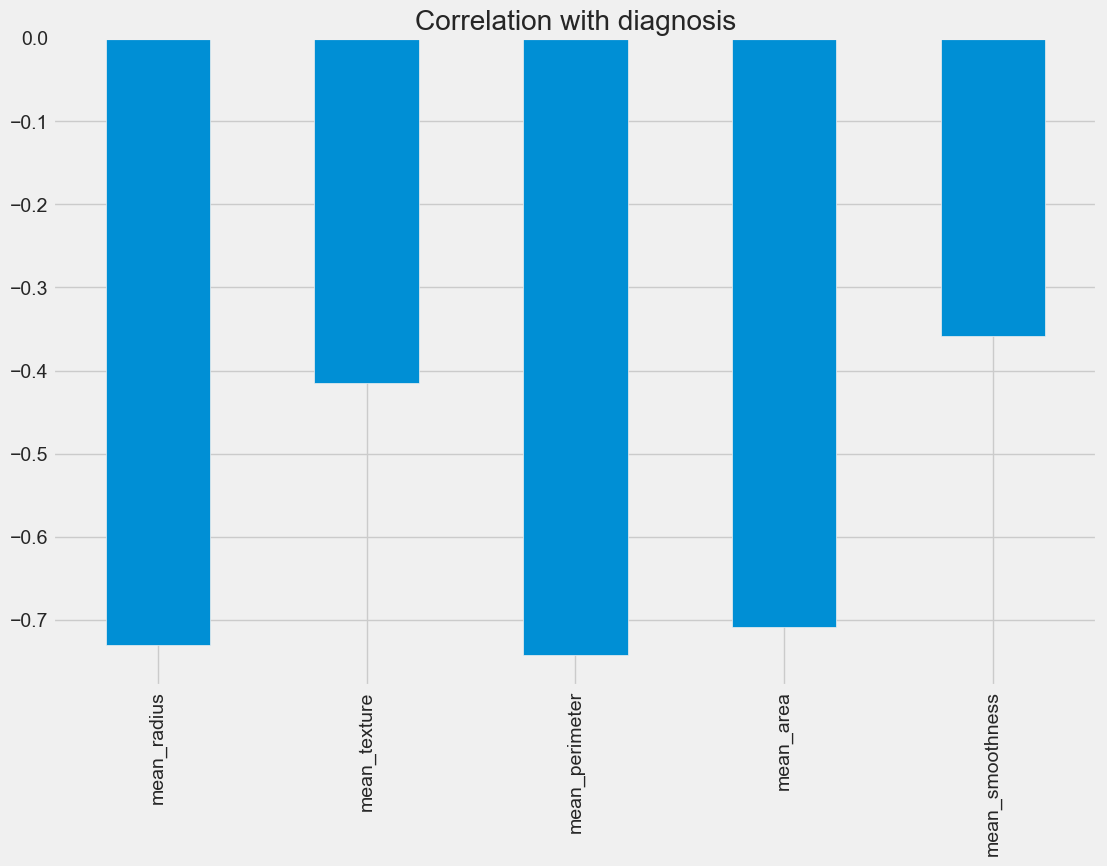

In [12]:

df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with diagnosis")

In [13]:
dataset=df

## Supervised Learning Algorithms Implementations

### 1: Logistic Regression Algorithm

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
feature_cols = [col_name for col_name in dataset.columns if col_name != 'diagnosis']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(dataset[feature_cols], dataset.diagnosis))
# Create the dataframes
X_train = dataset.loc[train_idx, feature_cols]
y_train = dataset.loc[train_idx, 'diagnosis']

X_test  = dataset.loc[test_idx, feature_cols]
y_test  = dataset.loc[test_idx, 'diagnosis']

In [16]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_0 = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.92,0.91,0.91,0.91,0.91
recall,0.84,0.95,0.91,0.90,0.91
f1-score,0.88,0.93,0.91,0.90,0.91
support,64.00,107.00,0.91,171.00,171.00


In [21]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=300).fit(X_train, y_train)
y_pred_1 = lr_l1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_1, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.83,0.96,0.91,0.90,0.91
recall,0.94,0.89,0.91,0.91,0.91
f1-score,0.88,0.92,0.91,0.90,0.91
support,64.00,107.00,0.91,171.00,171.00


In [22]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_2 = lr_l2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.93,0.94,0.94,0.94,0.94
recall,0.89,0.96,0.94,0.93,0.94
f1-score,0.91,0.95,0.94,0.93,0.94
support,64.00,107.00,0.94,171.00,171.00


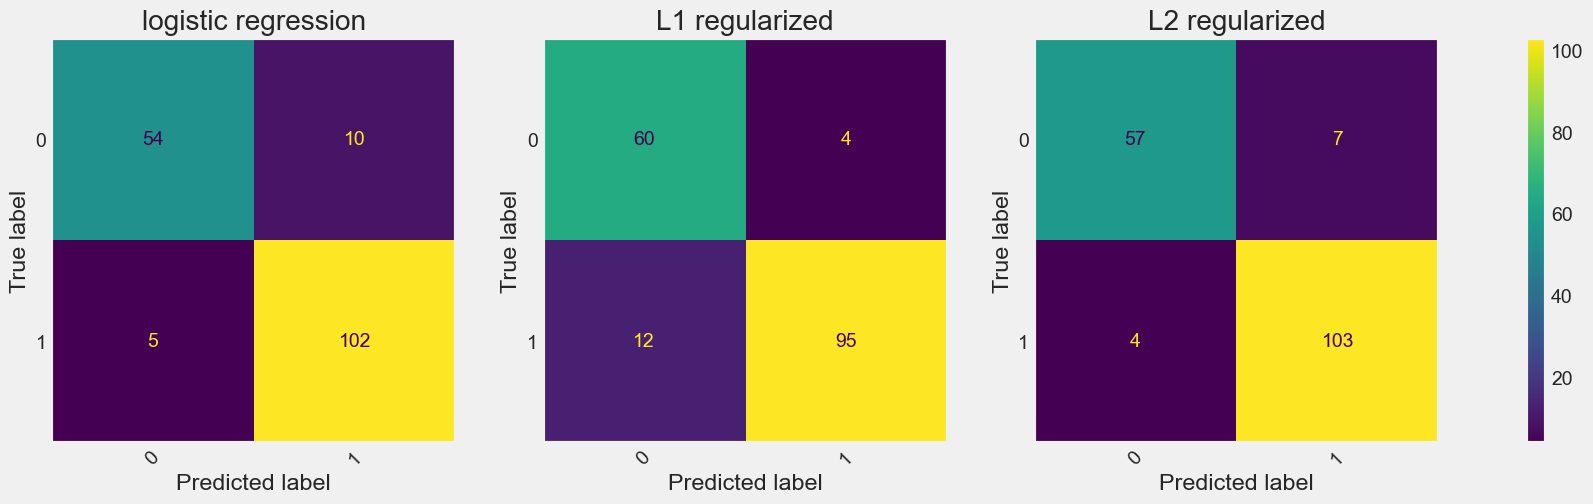

In [25]:
classifiers = {
    "logistic regression": lr,
    "L1 regularized": lr_l1,
    "L2 regularized": lr_l2

}

f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()


### 2: KNN Algorithm

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

In [27]:

max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Get minimum error id 
min_error_id = error_results['Error Rate'].idxmin()

# Get Best K 
error_results.loc[min_error_id]

K            5.00
Error Rate   0.11
Name: 4, dtype: float64

In [28]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

,0,1,accuracy,macro avg,weighted avg
precision,0.91,0.86,0.88,0.89,0.88
recall,0.75,0.95,0.88,0.85,0.88
f1-score,0.82,0.91,0.88,0.86,0.87
support,64.00,107.00,0.88,171.00,171.00


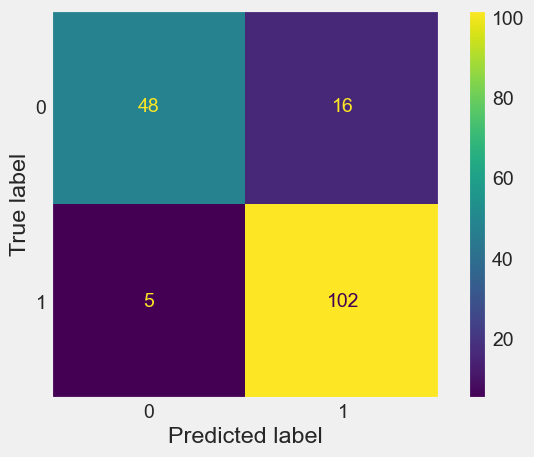

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

### 3: XGBoost Algorthim

In [30]:
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:000m eta 0:00:010:00:01

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [7],
    "learning_rate": [0.05],
    "gamma": [0, 0.25, 1, 10],
    "reg_lambda": [0],
    "scale_pos_weight": [1, 3, 5, 7, 10],
    "subsample": [0.1,0.2, 0.3, 0.4, 0.5, 0.8],
    "colsample_bytree": [0.5,0.7],
}


# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [35]:
grid_cv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 1,
 'learning_rate': 0.05,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 3,
 'subsample': 0.4}

In [36]:
final_xgb_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

_ = final_xgb_cl.fit(X_train, y_train)

y_pred = final_xgb_cl.predict(X_test)

xgb_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
xgb_report

,0,1,accuracy,macro avg,weighted avg
precision,0.89,0.95,0.93,0.92,0.93
recall,0.92,0.93,0.93,0.93,0.93
f1-score,0.91,0.94,0.93,0.93,0.93
support,64.00,107.00,0.93,171.00,171.00


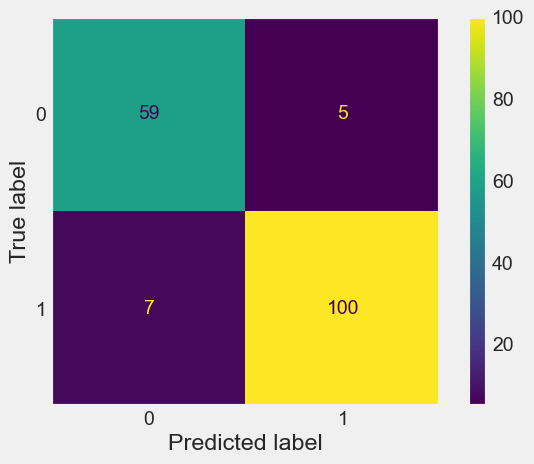

In [37]:
cm = confusion_matrix(y_test, y_pred, labels=final_xgb_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_xgb_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()

### 4: SVC Algorthim

In [38]:
from sklearn.svm import SVC

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)

SVC_cl = svc.fit(X_train, y_train)
y_pred = SVC_cl.predict(X_test)
SVC_cl_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
SVC_cl_report

,0,1,accuracy,macro avg,weighted avg
precision,0.90,0.84,0.85,0.87,0.86
recall,0.69,0.95,0.85,0.82,0.85
f1-score,0.78,0.89,0.85,0.83,0.85
support,64.00,107.00,0.85,171.00,171.00


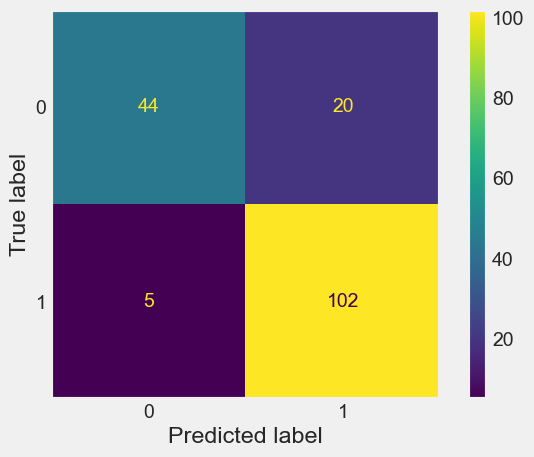

In [39]:
cm = confusion_matrix(y_test, y_pred, labels=SVC_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()